<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/laurakunstler/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'

In [3]:
raw_sat_data = ''
with open(sat_filepath, 'r') as f:
    raw_sat_data = f.read()
print raw_sat_data[:50]  

#I just wanted to see what this looked like...

State,Rate,Verbal,Math
CT,82,509,510
NJ,81,499,513


In [4]:
data = [raw_row.split(',') for raw_row in raw_sat_data.split('\n')]
sat_dict = {data[0][i]: [row[i] if i == 0 
                         else int(row[i]) 
                         for row in data[1:-1]] 
            for i in range(4)}

print(sat_dict)

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_df_dict = pd.DataFrame(sat_dict)
sat_df = pd.read_csv(sat_filepath)

In [6]:
sat_df_dict.head(2)

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499


In [7]:
sat_df.head(2)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513


In [8]:
sat_df_dict.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

In [9]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### Observations:
I noticed that when I input the dictionary, I had to convert the values to integers myself, whereas when I loaded the dataframe from the file using pandas, pandas loaded them as ints for me. Also, pandas kept the columns in the same order as they were in the CSV file, but if I used a dictionary I did not have control over what order the columns appeared in in the dataframe.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [11]:
sat_df.iloc[-1]

State     All
Rate       45
Verbal    506
Math      514
Name: 51, dtype: object

#### What the data appears to be:

It seems as if this data shows the percent of high school students who took the SAT in each state and the state average scores on the verbal and math sections of the SAT.

There is also a row where State == 'All', which I think shows the average rate, verbal score, and math score for all high schoolers in the US, without grouping by state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

## SAT Data Dictionary

The SAT data analyzed shows average SAT scores and participation rates broken up by state for the 50 US states plus DC and a row for All states, which I am assuming means the mean of all students who took the SAT, without grouping them by states.

This dataset has 52 rows (one for each state, as described above) and 4 columns, described below.

**Variable** | **DataType** | **Description**  
--- | --- | ---
*State* | object (string values) | State that administered the SAT. Includes DC and All.
*Rate* | int64 | Participation rate of high school graduates who took the SAT 
*Verbal* | int64 | State's average score on the Verbal section of the SAT (max score 800)
*Math* | int64 | State's average score on the Math section of the SAT (max score 800)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

(0, 16)

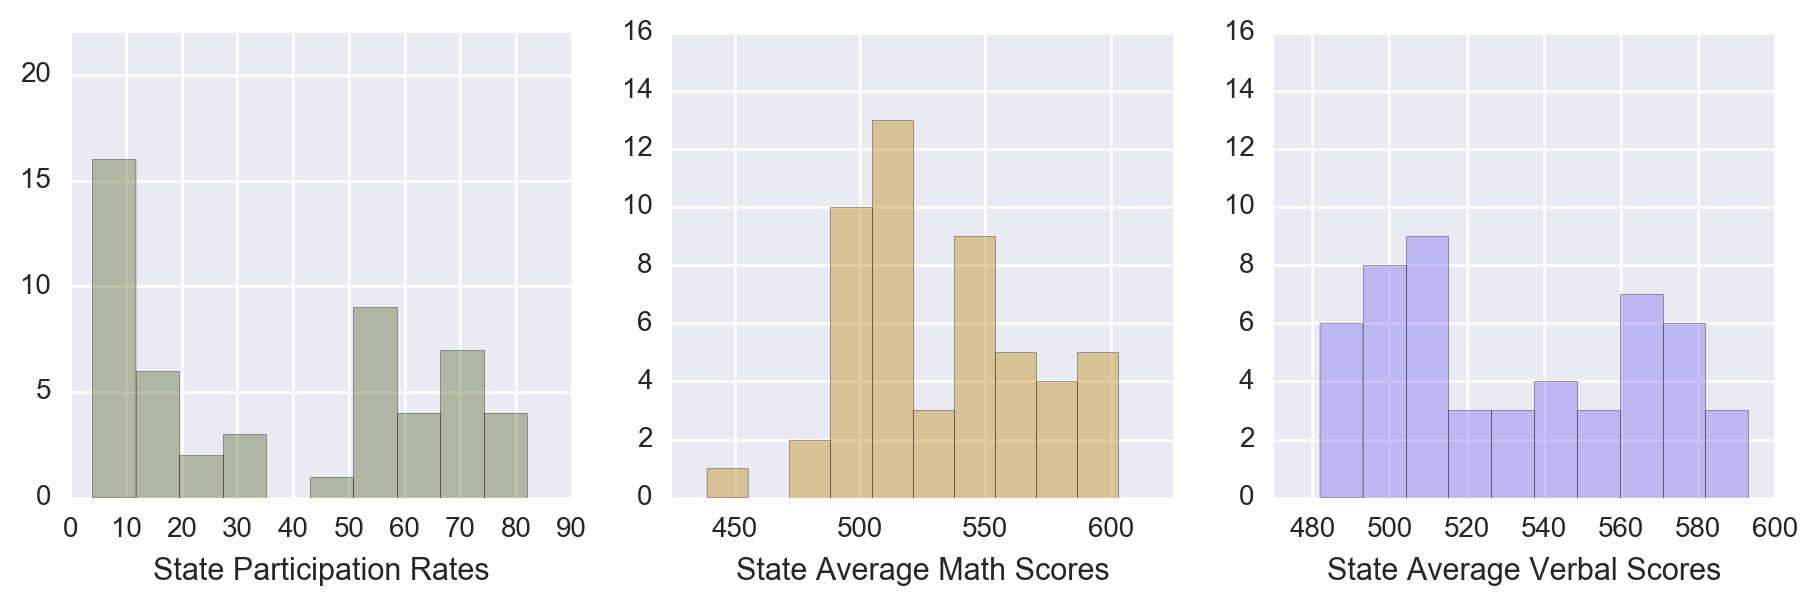

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (11, 3))

ax1 = sns.distplot(sat_df['Rate'], kde = False, bins = 10, ax = ax[0], color = 'darkolivegreen')
ax1.set_xlabel('State Participation Rates')
ax1.set_ylim([0, 22])


ax2 = sns.distplot(sat_df['Math'], kde = False, bins = 10, ax = ax[1], color = 'darkgoldenrod')
ax2.set_xlabel('State Average Math Scores')
ax2.set_xlim([425, 625])
ax2.set_ylim([0, 16])

ax3 = sns.distplot(sat_df['Verbal'], kde = False, bins = 10, ax = ax[2], color = 'mediumslateblue')
ax3.set_xlabel('State Average Verbal Scores')
ax3.set_xlim([470, 600])
ax3.set_ylim([0,16])

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

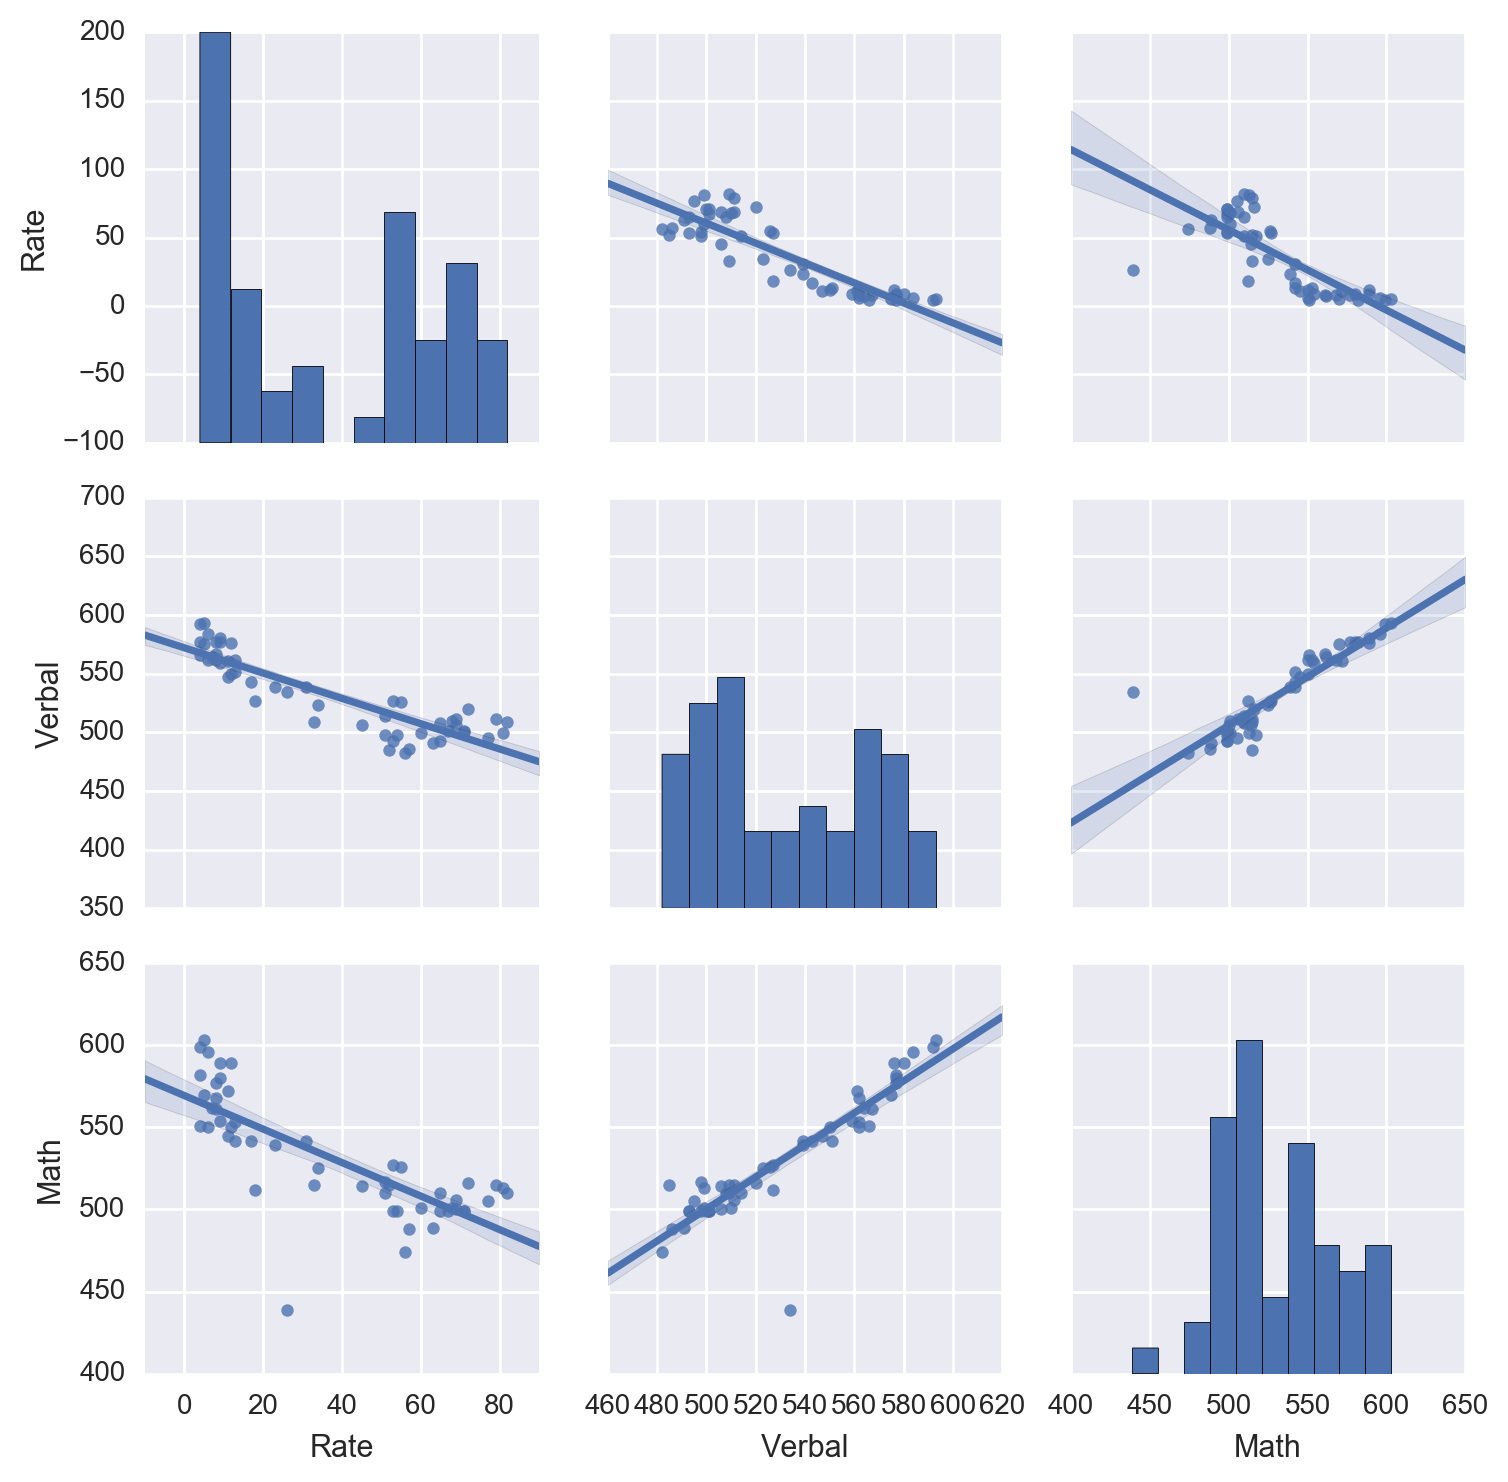

In [13]:
sns.pairplot(sat_df, kind = 'reg')

#### What the pairplot shows:

From the plots that show verbal vs. math scores, it appears that the average verbal and math scores had a positive correlation. To me, this indicates that more students who took the SAT were prepared overall.

From the scatter plots that show participation rate vs. math and participation rate vs. verbal, we can see a negative correlation. This shows that in states that had low participation rates, students who did take the SAT were more prepared than the average student in the country. This makes sense - if a state has a high participation rate that indicates that it is pushing students to take the test even if they are not going to college or preparing for it, which pulls down their average scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

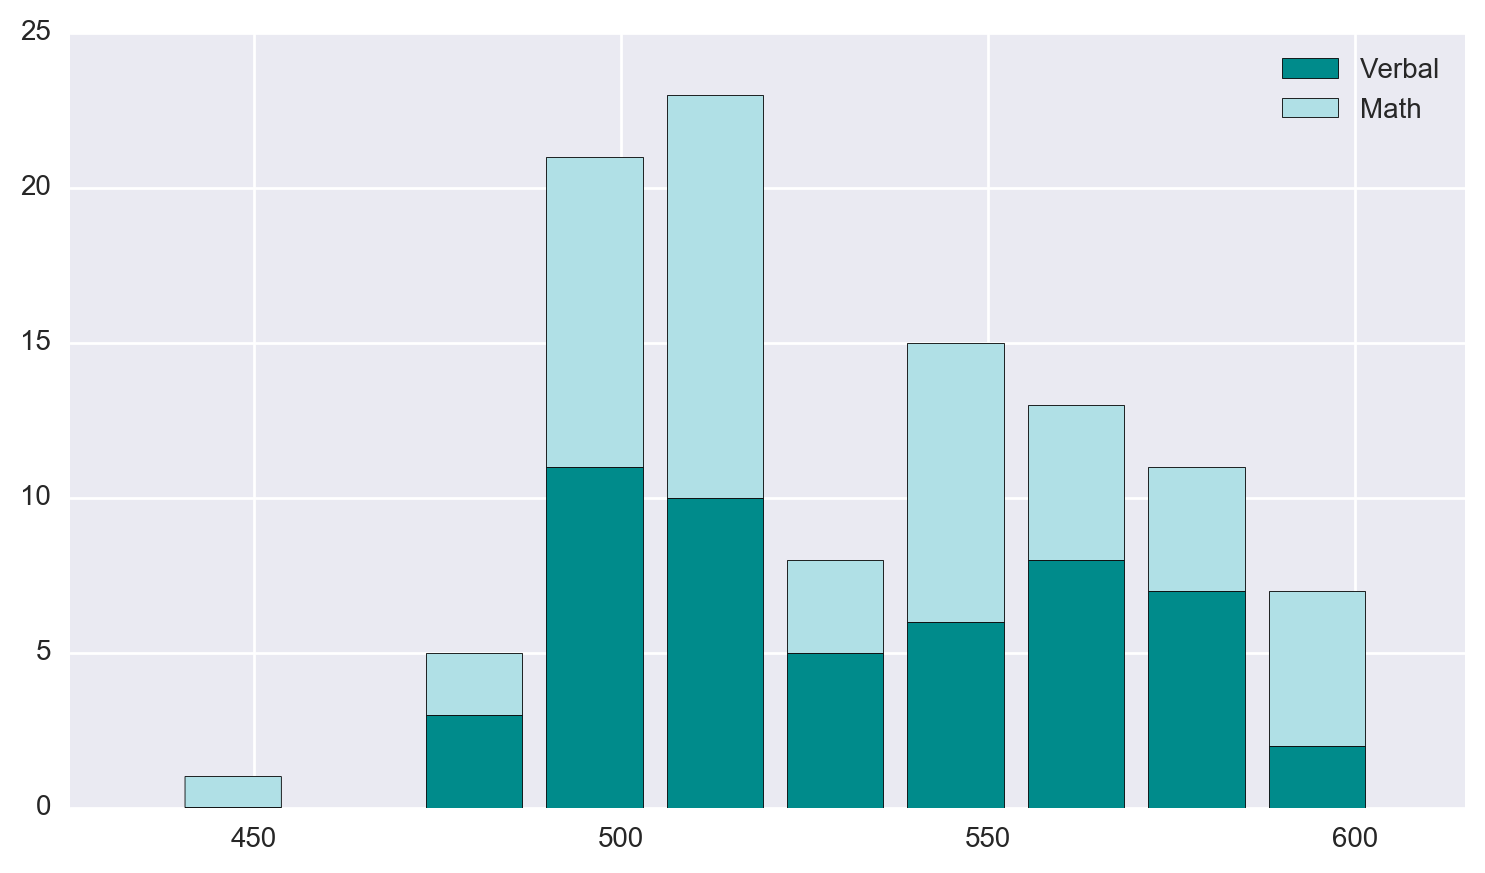

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
ax.set_xlim([425, 615])
plt.hist([sat_df['Verbal'], sat_df['Math']], stacked = True, bins = 10, 
         color = ['darkcyan', 'powderblue'], label =['Verbal', 'Math'])
ax.legend(loc = 'upper right')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Using boxplots, it is much easier to compare the distributions of verbal and math scores as you can see how the distributions line up. 

The problem with including Rate on this chart is that the rate is a percentage, so the values vary from 0 to 100, whereas the scores are out of 800, so they are on a different scale. 

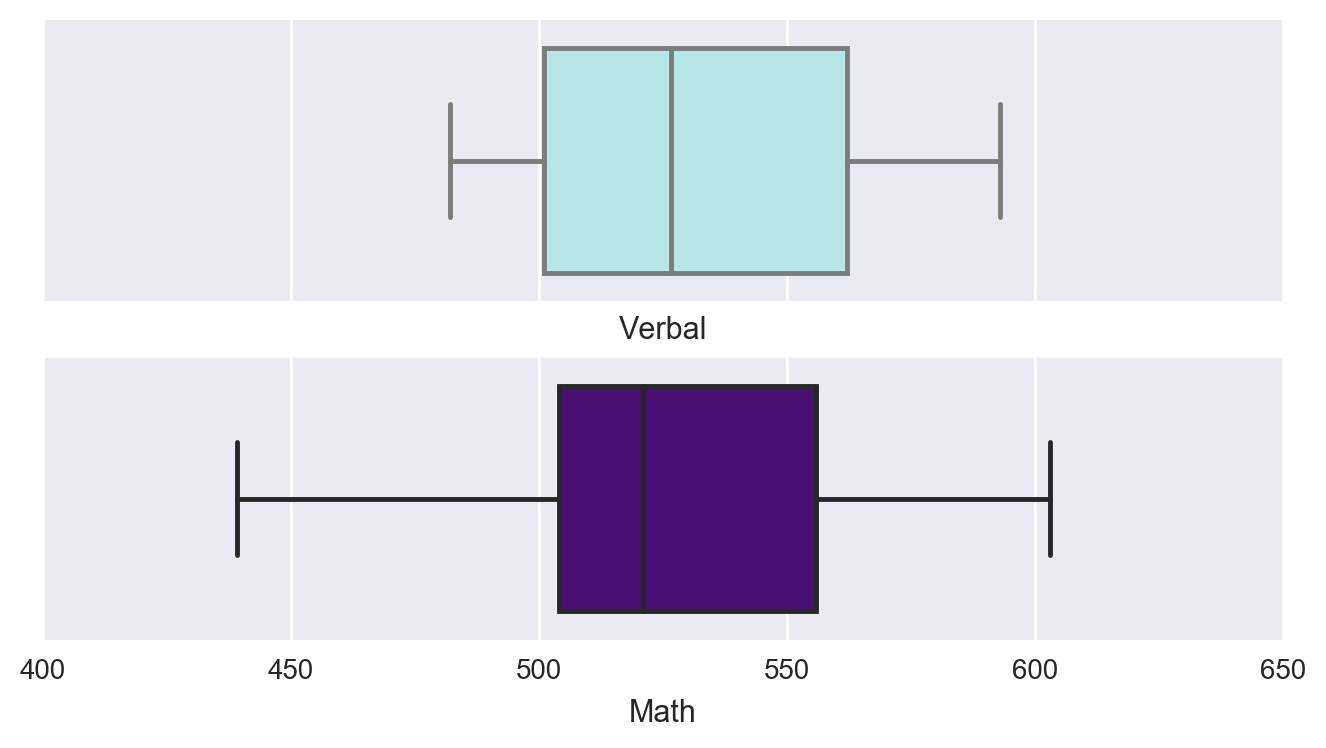

In [15]:
# Using Seaborn:
fig, ax = plt.subplots(2, 1, figsize = (8, 4), sharex = True)

ax1 = sns.boxplot(sat_df['Verbal'], ax = ax[0], color = 'paleturquoise')

ax2 = sns.boxplot(sat_df['Math'], ax = ax[1], color = 'indigo')

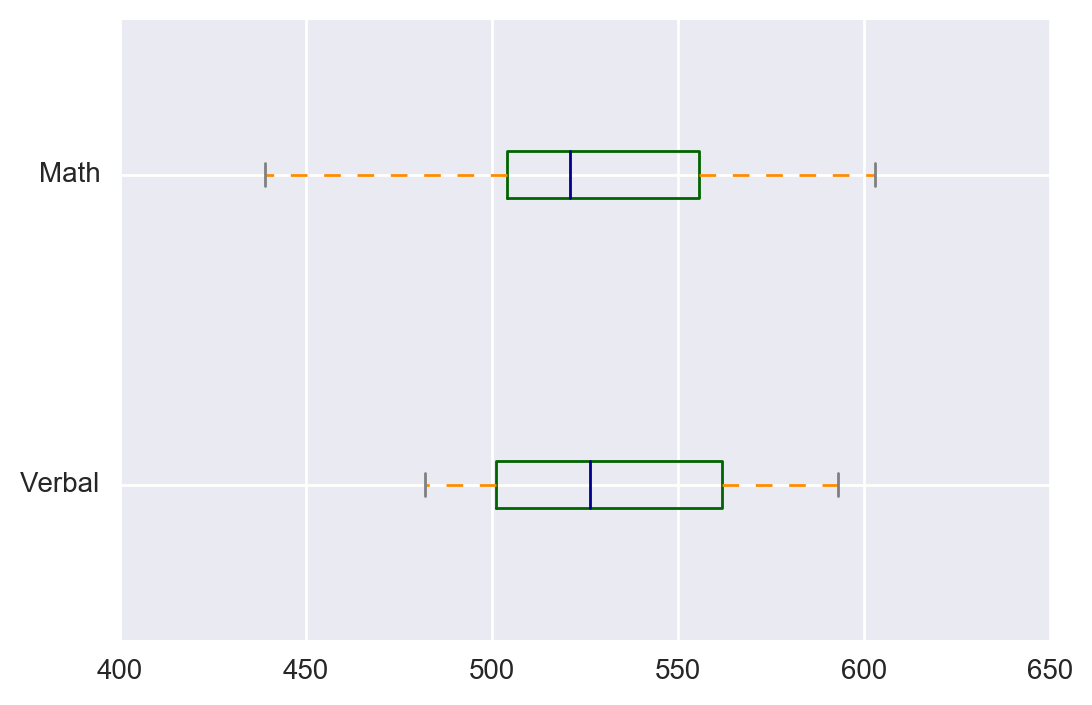

In [16]:
# Same thing, but with pandas. I didn't think it was as pretty.
# I wasn't sure if "on the same chart" meant on the same axis or on the same figure.

verbal_math = sat_df[['Verbal', 'Math']]
boxplot_colors = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

verbal_math.plot.box(vert = False, color = boxplot_colors)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In order to plot these all on the same plot, I want to normalize my data so that everything is on the same scale. The top plot shows what it looks like if I don't normalize my data. It is difficult to compare the rate because it's on a different scale. The bottom plot shows the boxplots for the SAT data after it's been normalized.

In [17]:
def normalize(series):
    return (series - series.mean()) / series.std()

normalized_sat = sat_df[['Rate', 'Verbal', 'Math']].apply(normalize)

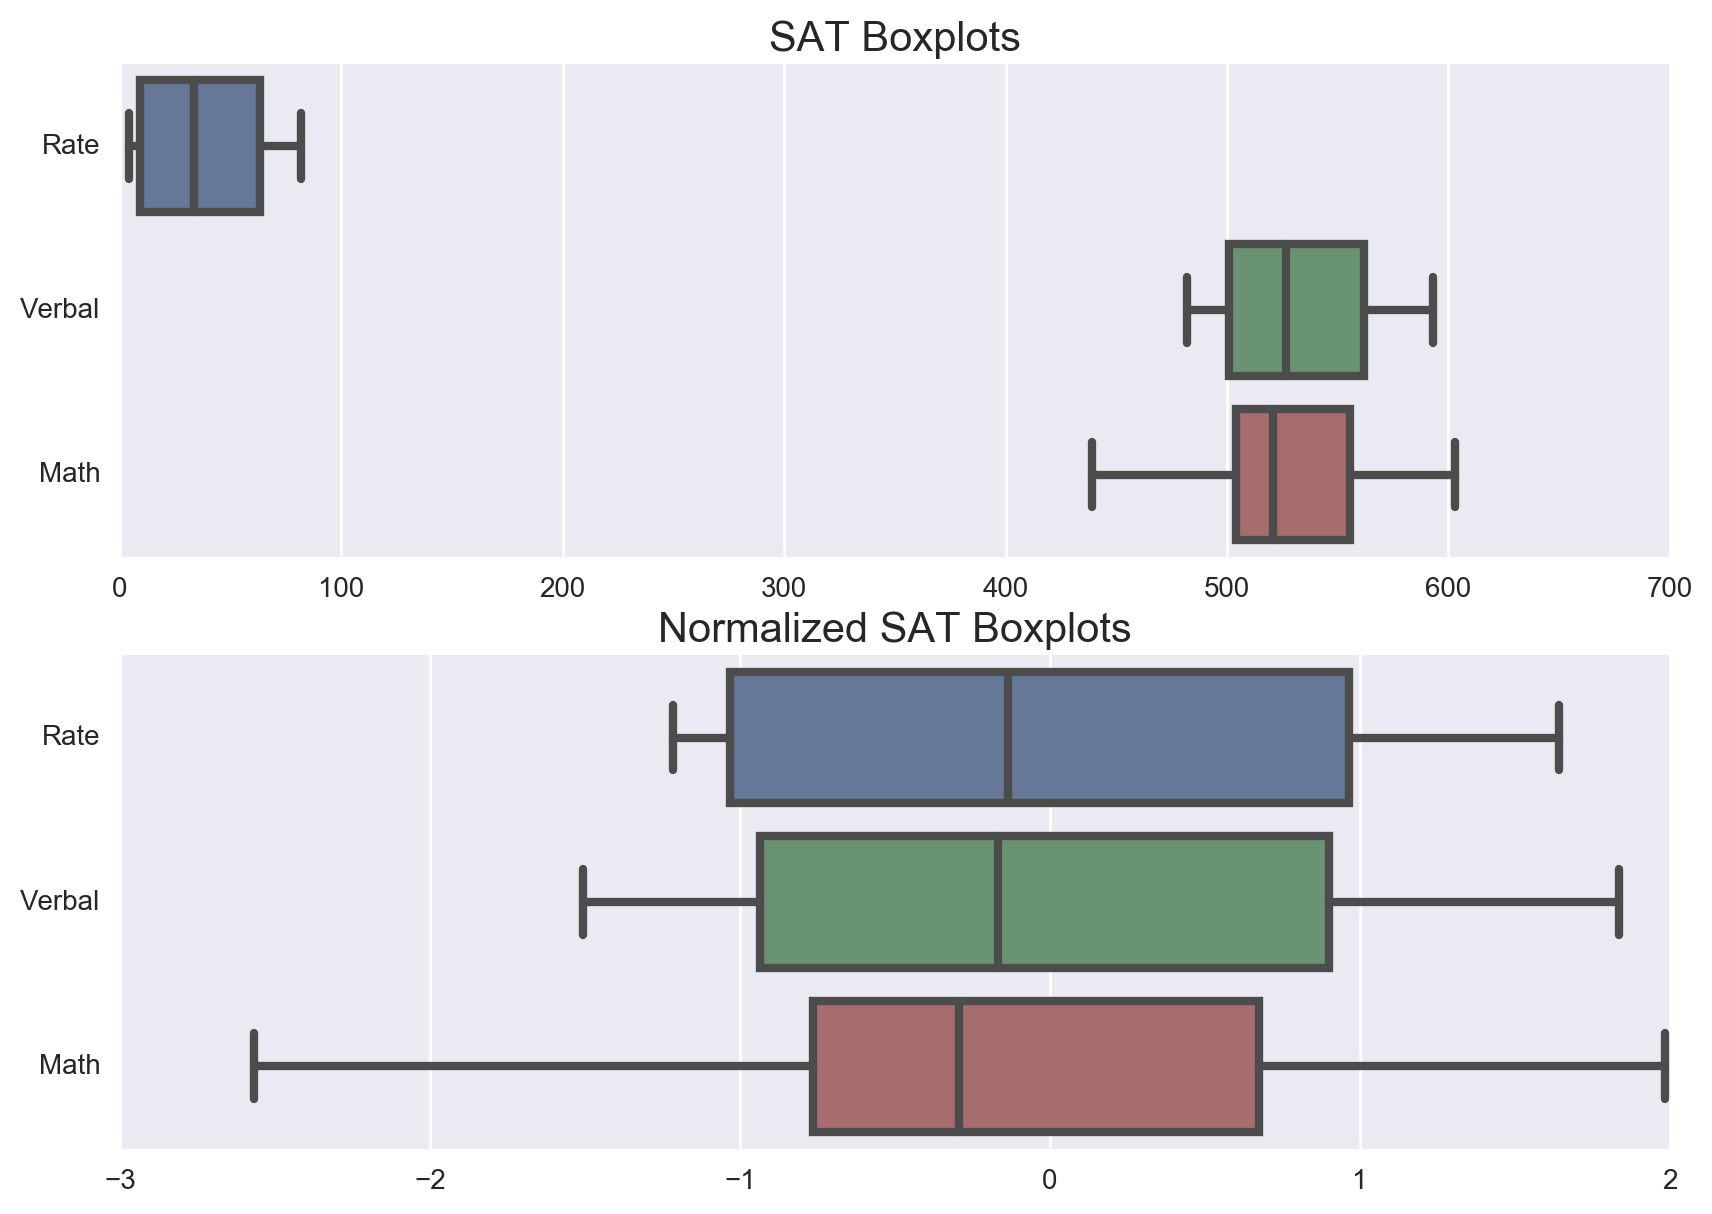

In [23]:
fig, axis_array = plt.subplots(2, 1, figsize = (10, 7))

ax1 = sns.boxplot(data = sat_df, orient = 'h', fliersize = 5, linewidth = 3, saturation = 0.5,
              ax = axis_array[0])
ax2 = sns.boxplot(data = normalized_sat, orient = 'h', fliersize = 5, linewidth = 3, saturation = 0.5,
              ax = axis_array[1])

ax1.set_title('SAT Boxplots', fontsize = 15)
ax2.set_title('Normalized SAT Boxplots' ,  fontsize = 15)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [24]:
# I started out by taking a subset of the data that does not include 'All'.
# I decided to take out 'All' because it is not a state and I didn't want to throw off the mean.
# I left in DC after debating with myself about it because it is just one city but I thought that
# data should still count.

sat_states = sat_df[sat_df['State'] != 'All']

verbal_above_mean = sat_states[sat_states['Verbal'] > sat_states['Verbal'].mean()]

print 'Out of ' + str(len(sat_states)) + ' states, ' + str(len(verbal_above_mean)) + ' of them have verbal scores above the mean.'
print 'This equates to ' + str(int((float(len(verbal_above_mean)) / len(sat_states)) * 100)) + ' percent of states.'
verbal_above_mean.head(3)

Out of 51 states, 24 of them have verbal scores above the mean.
This equates to 47 percent of states.


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539


24 of 51 states (including DC as a state) have verbal scores above the mean. This is close to half and this dataset is not very large, so while the data may be slightly skewed to the right, it's kind of hard to read into this too much. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
verbal_above_median = sat_states[sat_states['Verbal'] > sat_states['Verbal'].median()]

print 'Out of ' + str(len(sat_states)) + ' states, ' + str(len(verbal_above_median)) + ' of them have verbal scores above the median.'
print 'This equates to ' + str(int((float(len(verbal_above_median)) / len(sat_states)) * 100)) + ' percent of states.'
verbal_above_median.head(3)

Out of 51 states, 24 of them have verbal scores above the median.
This equates to 47 percent of states.


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539


In [26]:
len(sat_states[(sat_states['Verbal'] > sat_states['Verbal'].mean()) & (sat_states['Verbal'] > sat_states['Verbal'].median())])

24

In [27]:
sat_states['Verbal'].mean(), sat_states['Verbal'].median()

(532.5294117647059, 527.0)

The same states have a verbal score above the mean as above the median. This might be because the data is not very skewed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [28]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [29]:
math_literate_states = sat_df.sort_values(by = 'Verbal - Math').head(10)
articulate_states = sat_df.sort_values(by ='Verbal - Math', ascending = False).head(10)

In [30]:
math_literate_states.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [31]:
articulate_states.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [32]:
sat_df.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


Rate correlates negatively with both verbal and math, showing that the higher the rate, the lower the scores are for both of the sections. This is the same as what I saw in the pairplot. It makes sense because if the participation rate is very low, most students who take the SAT are prepared to do well on it.

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [33]:
sat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
Verbal - Math,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


#### What the rows returned by .describe() tell me:


**Row** | **Explanation** 
--- | ---
count | How many non-null entries there are for each column. These are the same for all the columns in the dataframe as there are no non-null states. 
mean | The mean of the values in each column. This is almost zero for verbal - math, showing that there are almost as many negatives as positives here. This agrees with the fact that the mean verbal and mean math are almost the same. Mean rate is 37%, showing that just over a third of high schoolers take the SAT.
std | The standard deviation of the values in each column. 
min | The mininum value for each column. The mininum rate is 4.0, which is quite low. This is not surprising as the max is 80% and the mean is 37%.
25% | 25% of the data in the column is below this number.
50% | The median of the data in the column.
75% | 75% of the data in the column is below this number.
max | The maximum value for each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [34]:
sat_df.cov()

# To get the correlation, you take the covariance (shown below) and divide by the
# product of both variables' standard deviation.

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [109]:
iowa_liquor = pd.read_csv('/Users/laurakunstler/Desktop/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [110]:
iowa_liquor.shape

(270955, 18)

In [111]:
iowa_liquor.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [112]:
iowa_liquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

I can see that I have a dataframe with 270955 rows and 18 columns.

The following columns have null values in them: 'County Number', 'County', 'Category', and 'Category Name'.

A few columns - 'Zip Code', 'State Bottle Cost', 'State Bottle Retail', and 'Sale (Dollars)' - have datatype 'object' when I expect them to be numbers, meaning that I will have to clean those columns up to use them.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

**Prices:**
The first thing I wanted to clean up was the data for the prices. Items in the "State Bottle Cost", "State Bottle Retail" and "Sale (Dollars)" columns had "$" in them so I removed the dollar signs and converted to values to floats.

In [113]:
def dollars_to_floats(value):
    try:
        return float(value.replace('$', ''))
    except:
        return np.nan
    
iowa_liquor['Sale (Dollars)'] = iowa_liquor['Sale (Dollars)'].map(dollars_to_floats)
iowa_liquor['State Bottle Cost'] = iowa_liquor['State Bottle Cost'].map(dollars_to_floats)
iowa_liquor['State Bottle Retail'] = iowa_liquor['State Bottle Retail'].map(dollars_to_floats)

iowa_liquor[['Sale (Dollars)', 'State Bottle Cost', 'State Bottle Retail']].head(3)

,Sale (Dollars),State Bottle Cost,State Bottle Retail
0,81.00,4.50,6.75
1,41.26,13.75,20.63
2,453.36,12.59,18.89


In [114]:
iowa_liquor.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

#### Zip Codes:

I found that only one item in the zip code column ('712-2') was not able to converted to an int, so I looked up what city in the dataframe matched that zip code and it was Dunlap. I googled Dunlap and found that their zip code is 51529. 712 is the area code (I'm not sure where the -2 came from). I replaced 712-2 with the zip code for Dunlap.

In [115]:
def check_nums(series):
    invalid = []
    for value in series:
        try:
            int(value)
        except:
            invalid.append(value)
    return set(invalid)
        
check_nums(iowa_liquor['Zip Code'])

{'712-2'}

In [116]:
print(iowa_liquor[iowa_liquor['Zip Code'] == '712-2']['City'].unique())
print(iowa_liquor[iowa_liquor['City'] == 'DUNLAP']['Zip Code'].unique())

#I can verify that only one city is missing the correct zip code and that city is Dunlap. 
#I can fix this then! I will replace the zips that are 712-2 with 51529 (the zip for Dunlap)

['DUNLAP']
['712-2']


In [117]:
def fix_zips(x):
    if x == '712-2':
        return 51529
    else:
        return int(x)

iowa_liquor['Zip Code'] = iowa_liquor['Zip Code'].map(fix_zips)
iowa_liquor.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40


In [118]:
iowa_liquor[iowa_liquor['City'] == 'DUNLAP'].head(2)
#The zips are fixed! Yay!

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
114,01/16/2015,4307,DUNLAP,51529,43.0,Harrison,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,8.50,12.75,2,25.5,1.5,0.40
2695,01/05/2015,4307,DUNLAP,51529,43.0,Harrison,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,1000,6.63,9.95,12,119.4,12.0,3.17


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

#### Adding a 'month' and a  'year' column:
This is not strictly 'cleaning', but as I have chosen not to change the date into datetime format, I think it will make it a lot easier to mask the data by month or by year if I do this.

In [120]:
iowa_liquor.insert(1, 'Month', iowa_liquor['Date'].map(lambda x: int(x[0:2])))
iowa_liquor.insert(2, 'Year', iowa_liquor['Date'].map(lambda x: int(x[-4:])))

iowa_liquor.head(2)

,Date,Month,Year,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,11,2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,3,2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40


#### Filling in missing categories:
Some of the stores are missing category data. I read through the item descriptions for items that were missing categories and filled in the missing ones with a category name that fit. This way these items can later be filled into broad categories more accurately.
This part is a little long because I kept checking what I still needed to fill in. Sorry about that!

In [121]:
iowa_liquor['Item Description'][iowa_liquor['Category Name'].isnull()].unique()

array(['Herradura Gold Reposado 6pak', 'Hennessy VS',
       'Grand Marnier Raspberry Peach', 'Hennessy Vs Cognac',
       'Svedka Vodka', 'Disaronno Amaretto',
       "Tim Smith's Climax Moonshine",
       'Jack Daniels TN Honey & Jack Daniels TN Fire 750mls w/2Gls',
       'Captain Morgan Coconut', 'Evan Williams Egg Nog',
       'Grand Marnier Cordon Rouge', 'Ole Smoky Cherry Moonshine',
       "Dr. McGillicuddy's Peach Mini", 'Galliano Liqueur',
       'Grey Goose w/2 Martini Glasses', 'Exotico Blanco',
       'Disaronno Amaretto Cavalli Mignon 3-50ml Pack', '1800 Silver',
       'Hennessy Black', 'Hennessy Vs Cognac 100ml',
       'Captain Morgan Grapefruit', 'Tres Generaciones Anejo',
       'Stolichnaya Premium Vodka 80 Proof (lv)',
       'Bombay Sapphire w/Glass', 'Three Olives Cake Flavored Vodka',
       'Captain Morgan Pineapple', "Gosling's Black Seal",
       'Blue Chair Bay Coconut', 'Licor 43', 'Rondiaz Rum Spiced',
       'Stolichnaya Premium Vodka 80 Prf', 'Olmeca Alt

#### My orignal plan:
I tried making a dictionary with the category numbers that were missing names and then using the dictionary to populate some of the null values in category names. I could not figure out how to do this. What I tried is shown below. Instead, I filled the in just using the words.

In [122]:
iowa_liquor['Category'][iowa_liquor['Category Name'].isnull() & iowa_liquor['Category'].notnull()].unique()

array([ 1022200.,  1052100.,  1082100.,  1032100.,  1091100.,  1062500.,
        1091300.,  1082200.,  1062400.,  1011700.,  1092100.])

In [123]:
iowa_liquor['Item Description'][iowa_liquor['Category'] == 1092100.].unique()

array(['Leblon Cachaca'], dtype=object)

In [124]:
category_dict = {1022200.:'Misc. Tequila', 1052100.: 'Cognac',  1082100.:'Misc. Liqueur', 1032100.:'Misc. Vodka', 
                 1091100.:'Misc. Moonshine', 1062500.:'Flavored Rum', 1091300.:'Moonshine', 1082200.:'Fruit Liqueur',
                 1062400.:'Spiced Rum', 1011700.:'Moonshine', 1092100.:'Cachaca'}

In [125]:
iowa_liquor['Category Name'][iowa_liquor['Category Name'].isnull()] = iowa_liquor['Category'][iowa_liquor['Category Name'].isnull()].map(lambda x: category_dict[x])

KeyError: nan

In [126]:
def cat_fill(item):
    item = item.lower()
    if '/w' in item:
        return 'GIFT SET'
    elif 'nog' in item:
        return 'NOG'
    elif 'cognac' in item or 'hennessy' in item or 'vsop' in item:
        return 'COGNAC'
    elif 'vodka' in item or 'svedka' in item or 'belvedere' in item:
        return 'VODKA'
    elif 'captian morgan' in item or 'rum' in item:
        return 'RUM'
    elif 'moonshine' in item:
        return 'MOONSHINE'
    elif 'whiskey' in item:
        return 'WHISKEY'
    elif 'reposado' in item or 'silver' in item or 'rondiaz' in item or 'ricura' in item:
        return 'TEQUILA'
    elif 'amaretto' in item:
        return 'AMARETTO'
    else:
        return 'MISC'
    
iowa_liquor['Category Name'][iowa_liquor['Category Name'].isnull()] = iowa_liquor['Item Description'][iowa_liquor['Category Name'].isnull()].map(cat_fill)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [127]:
iowa_liquor.head(2)

,Date,Month,Year,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,11,2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,3,2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40


In [128]:
iowa_liquor.info()
#no more null category names. Moving on...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null object
Month                    270955 non-null int64
Year                     270955 non-null int64
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null int64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270955 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270

#### Filling in missing counties:
I started this and then gave up - I'm sure there is a way to do this! I started by printing out the zip codes that were missing. I found a table of zip codes, cities, and counties in Iowa and created a dictionary that matched the zip code with its county. Now I can't figure out how to get those values into my dataframe! But you can see what I tried.

In [206]:
print(iowa_liquor['Zip Code'][iowa_liquor['County'].isnull()].unique())

[52402 51103 50707 52205 50677 50441 50421 52241 52804 52732 50211 51632
 52317 50225 50009 51529 50401 50022 50049 52136 50483 52802 50601 50469
 51537 50703 50317 52358 52003 52404 51653 50025 52590 51241 50213 52591
 50237 50501]


In [207]:
zips = {52402: 'Linn', 51103: 'Woodbury', 50707: 'Black Hawk', 52205: 'Jones', 50677: 'Bremer', 50441: 'Franklin', 
        50421: 'Wright', 52241: 'Johnson', 52804: 'Scott', 52732: 'Clinton', 50211: 'Warren', 51632: 'Page', 
        52317: 'Johnson', 50225: 'Marion', 50009: 'Polk', 51529: 'Harrison', 50401: 'Cerro Gordo', 50022:'Cass',
        50049:'Lucas', 52136: 'Howard', 50483:'Kossuth', 52802: 'Scott', 50601:'Hardin', 50469:'Cerro Gordo', 
        51537:'Shelby', 50703:'Black Hawk', 50317:'Polk', 52358:'Cedar', 52003:'Dubuque', 52404:'Linn', 
        51653:'Fremont', 50025:'Audubon', 52590:'Wayne', 51241:'Lyon', 50213:'Clarke', 52591:'Keokuk',50237:'Polk', 
        50501:'Webster'}

def insert_county(value, zipcode, zips):
    if value == value:
        return value
    else:
        return zips[zipcode]

iowa_liquor['County'] = iowa_liquor['County', 'Zip Code'].apply(insert_county)

KeyError: ('County', 'Zip Code')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


My plan is to group the dataframe by the store number and then the month, and then look at only the year 2015. I'm then going to look at the count of 'City' because there are no null values in city. If there is a store that doesn't have any entries for any month in 2015, I will consider that store to either not have been open for the full year or else to be an outlier that should not be considered to have reliable yearly data (it would be a very odd liquor store to to sell anything for a whole month, and is probably either not open or a front for something). I don't think I want to remove the stores as I might need that data for something else, but I will make a new 'clean' dataframe without them that just has 2015 data.

Update: It turned out there were a lot of stores (about 40%) that did not have data for a month in 2015. However, I decided it still made sense to stick to my original plan and make a new 2015 dataframe without those stores. If they are missing data for a month, they will have incorrect yearly summary statistics and will therefore not be very helpful!

In [130]:
month_groups = iowa_liquor[['Store Number', 'Month', 'City']][iowa_liquor['Year'] == 2015].groupby(['Store Number', 'Month']).count().reset_index()
month_groups.head(13)

,Store Number,Month,City
0,2106,1,44
1,2106,2,42
2,2106,3,43
3,2106,4,44
4,2106,5,41
5,2106,6,46
6,2106,7,52
7,2106,8,40
8,2106,9,41
9,2106,10,54


In [132]:
stores = month_groups['Store Number'].unique()
problem_stores = []
for store in stores:
    x = store
    if len(month_groups[month_groups['Store Number'] == x].groupby('Month').count()) < 12:
        problem_stores.append(x)
print(problem_stores[:15])
print(len(problem_stores))
print(float(len(problem_stores))/len(stores))

[2238, 2367, 2487, 2498, 2599, 2668, 2671, 2672, 2836, 2839, 2845, 2849, 2851, 2852, 2853]
542
0.395043731778


In [139]:
clean_2015 = iowa_liquor[iowa_liquor['Year'] == 2015]
clean_2015['Store Number'] = clean_2015['Store Number'].map(lambda x: x if x not in problem_stores else np.nan)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [144]:
clean_2015 = clean_2015.dropna(subset = ['Store Number'])

In [151]:
clean_2015.head(3)

,Date,Month,Year,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,11,2015,3717.0,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
4,08/18/2015,8,2015,3654.0,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55
5,04/20/2015,4,2015,2569.0,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.5,2.77


#### Easier Way?
This was the only way I could think of to clean up these values. I'm sure there is a better, more efficient way though.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [155]:
sales_year_2015 = clean_2015[['Store Number', 'Sale (Dollars)']].groupby('Store Number').sum().sort_values(by = 'Sale (Dollars)', ascending = False)
sales_year_2015.head(5)

,Sale (Dollars)
Store Number,
2633.0,1000783.30
4829.0,878812.70
3385.0,441983.55
2512.0,419746.83
3420.0,352020.66


### 10.2 Calculate the profit each store is making in 2015.


In [158]:
iowa_liquor['Profit'] = (iowa_liquor['State Bottle Retail'] - iowa_liquor['State Bottle Cost']) * iowa_liquor['Bottles Sold']
clean_2015['Profit'] = (clean_2015['State Bottle Retail'] - clean_2015['State Bottle Cost']) * clean_2015['Bottles Sold']

clean_2015.head(3)

#I put a profit column in both dataframes, in case I need it in iowa_liquor later.

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,Month,Year,Store Number,City,Zip Code,County Number,County,Category,Category Name,...,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit
0,11/04/2015,11,2015,3717.0,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,27.00
4,08/18/2015,8,2015,3654.0,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,43.20
5,04/20/2015,4,2015,2569.0,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.5,2.77,39.96


In [163]:
clean_2015.dtypes

Date                      object
Month                      int64
Year                       int64
Store Number             float64
City                      object
Zip Code                   int64
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
Profit                   float64
dtype: object

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [168]:
clean_2015[['County', 'Profit']].groupby('County').sum().sort_values(by = 'Profit', ascending = False).head(3)

,Profit
County,
Polk,1902709.66
Linn,746540.09
Scott,663949.95


In [166]:
clean_2015['Profit per Gallon'] = clean_2015['Profit'] / clean_2015['Volume Sold (Gallons)']
clean_2015[['County', 'Profit per Gallon']].groupby('County').sum().sort_values(by = 'Profit per Gallon', ascending = False).head(3)

,Profit per Gallon
County,
Polk,856407.749965
Linn,382689.029002
Scott,311728.851707


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [179]:
def assign_cat(liquor_category):
    liquor_category = liquor_category.lower()
    if  liquor_category == 'misc':
        return 'MISC'
    elif 'schnapps' in liquor_category:
        return'SCHNAPPS'
    elif 'whisk' in liquor_category or 'rye' in liquor_category or 'bourbon' in liquor_category:
        return 'WHISKEY'
    elif 'scotch' in liquor_category:
        return 'WHISKEY'
    elif 'vodka' in liquor_category:
        return 'VODKA'
    elif 'tequila' in liquor_category:
        return 'TEQUILA'
    elif 'brand' in liquor_category or 'cognac' in liquor_category:
        return 'BRANDY'
    elif 'gin' in liquor_category:
        return 'GIN'
    elif 'beer' in liquor_category:
        return 'BEER'
    elif 'rum' in liquor_category:
        return 'RUM'
    elif 'pack' in liquor_category:
        return 'PACK'
    elif 'cocktail' in liquor_category:
        return 'COCKTAIL'
    elif 'special' in liquor_category:
        return 'SPECIALTY'
    elif 'set' in liquor_category:
        return 'SET'
    else:
        return 'LIQUEUR'
    
iowa_liquor['Broad Category'] = iowa_liquor['Category Name'].map(assign_cat)
clean_2015['Broad Category'] = clean_2015['Category Name'].map(assign_cat)
clean_2015[clean_2015['Broad Category'] == 'WHISKEY']['Category Name'].unique()

array(['CANADIAN WHISKIES', 'SINGLE BARREL BOURBON WHISKIES',
       'BLENDED WHISKIES', 'TENNESSEE WHISKIES', 'WHISKEY LIQUEUR',
       'SINGLE MALT SCOTCH', 'SCOTCH WHISKIES',
       'STRAIGHT BOURBON WHISKIES', 'IRISH WHISKIES',
       'STRAIGHT RYE WHISKIES', 'ROCK & RYE', 'BOTTLED IN BOND BOURBON',
       'CORN WHISKIES', 'WHISKEY'], dtype=object)

In [175]:
clean_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196950 entries, 0 to 270954
Data columns (total 23 columns):
Date                     196950 non-null object
Month                    196950 non-null int64
Year                     196950 non-null int64
Store Number             196950 non-null float64
City                     196950 non-null object
Zip Code                 196950 non-null int64
County Number            196833 non-null float64
County                   196833 non-null object
Category                 196886 non-null float64
Category Name            196950 non-null object
Vendor Number            196950 non-null int64
Item Number              196950 non-null int64
Item Description         196950 non-null object
Bottle Volume (ml)       196950 non-null int64
State Bottle Cost        196950 non-null float64
State Bottle Retail      196950 non-null float64
Bottles Sold             196950 non-null int64
Sale (Dollars)           196950 non-null float64
Volume Sold (Liters)     1

### 10.5 Do relationships exist between the broader liquor type and profit?

In [177]:
clean_2015[['Broad Category', 'Profit', 'Volume Sold (Liters)']].groupby('Broad Category').sum().sort_values(by = 'Profit', ascending = False)

,Profit,Volume Sold (Liters)
Broad Category,,
WHISKEY,3158031.32,572995.62
VODKA,2064639.83,543546.28
RUM,886026.17,173063.75
LIQUEUR,646537.12,104122.09
GIN,505422.70,129476.66
TEQUILA,489405.05,72764.24
BRANDY,341058.41,53810.79
SCHNAPPS,310700.45,71662.40
COCKTAIL,145785.93,62740.78


It looks as though more whiskey is sold and more profit is made off of whiskey than other types of alcohol, followed by vodka, then rum. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [203]:
clean_2015[['Store Number', 'Bottle Volume (ml)', 'Volume Sold (Gallons)', 'Profit']].groupby('Store Number').mean().sort_values(by = 'Bottle Volume (ml)', ascending = False).head(3)

,Bottle Volume (ml),Volume Sold (Gallons),Profit
Store Number,,,
3934.0,1359.375000,4.064821,59.632500
4205.0,1336.666667,2.332133,34.700533
4001.0,1329.225352,3.570141,56.401690


In [204]:
clean_2015[['Store Number', 'Bottle Volume (ml)', 'Volume Sold (Gallons)', 'Profit']].groupby('Store Number').mean().sort_values(by = 'Bottle Volume (ml)', ascending = False).tail(3)

,Bottle Volume (ml),Volume Sold (Gallons),Profit
Store Number,,,
4669.0,444.062500,0.454875,39.289000
4686.0,433.390411,0.773219,13.638014
3894.0,421.271930,1.166360,18.610921


The most straightforward thing they could do is to tax the highest selling hard alcohol more than beer, wine, or liquours. However, this would be problematic for the smaller stores, as they also make the most money off of the highest selling hard alcohol. I did notice that certain stores sell a much higher mean bottle volume than others. I can probably assume that these are larger stores, and I can see that they also have a higher average profit per sale and a higher average volume sold. This could lead us to a possible higher tax on bigger bottles. However, this also might not work because people generally choose to buy bigger bottles because they are more cost effective, so if they have too high of a tax, people may not buy them as much, meaning the state is still out of some tax money.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [192]:
volume_by_month = iowa_liquor[['Month', 'Volume Sold (Gallons)','Profit']].groupby('Month').sum()
volume_by_month

,Volume Sold (Gallons),Profit
Month,,
1,68816.16,1249022.36
2,79631.90,1424524.51
3,83800.27,1522667.20
4,43062.54,768921.98
5,42760.35,756754.55
6,51370.67,921691.85
7,41098.72,726958.62
8,40712.69,722981.51
9,44409.25,796482.21


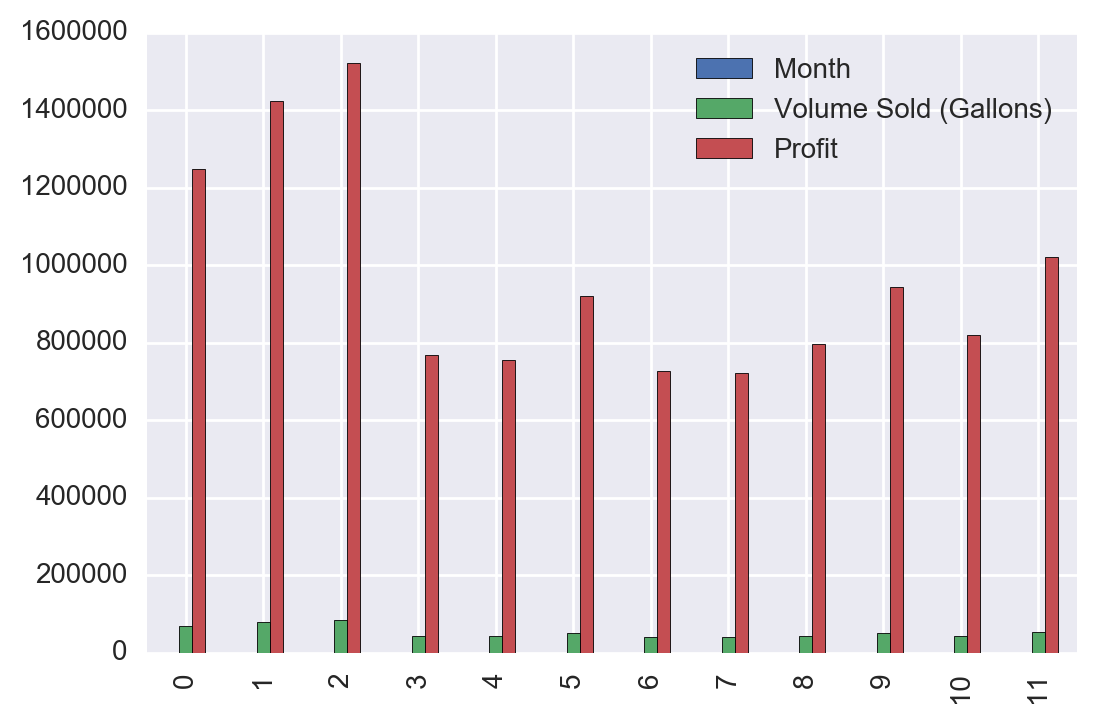

In [195]:
#volume_by_month = volume_by_month.reset_index()
volume_by_month.plot(kind = 'bar')

I thought that liquor sales would have been much higher in December than in other months, but surprisingly the volume sold was highest in March. 